# **Query Expansion Based on NLP and Word Embeddings.**



##Obejctive
This Jupyter Notebook presents an implementation of query expansion techniques based on natural language processing (NLP) and Word2Vec word embeddings. The primary objective is to preprocess a corpus, train a Word2Vec model, and expand queries using the trained model to improve the relevance of search results.

# Table of Contents

1. [Introduction](#introduction)

2. [Data Preprocessing](#data-preprocessing)

3. [Model Training](#model-training)

4. [Query Expantion](#query)

5. [Conclusion](#conclusion)



## Introduction
<a id='introduction'></a>

In information retrieval, the effectiveness of search engines heavily relies on the quality of queries submitted by users. Often, users might not articulate their information needs optimally, leading to suboptimal search results. Query expansion techniques aim to address this issue by augmenting original queries with additional terms that are semantically related, thereby enhancing the retrieval process.


## Data Preprocessing
<a id='data-preprocessing'></a>

First things first is to mount the drive to get access to the data provided.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Then, extract the corpus file (since loading the raw file takes too long)

In [ ]:
!pip install rarfile

In [ ]:
import rarfile

# Function to extract the RAR archive
def extract_rar(archive_path, extract_path):
    with rarfile.RarFile(archive_path, 'r') as archive:
        archive.extractall(extract_path)



the `nltk` library is being used to download essential datasets. These datasets include WordNet, which is a lexical database for English words, stopwords for filtering common words, and punkt for text tokenization. These downloads enable the subsequent natural language processing tasks within the notebook.

In [2]:
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

here we import essential modules for text preprocessing and machine learning tasks. including modules from the `nltk` library for stopwords removal, tokenization, stemming, and lemmatization.  `PCA` for principal component analysis, `Word2Vec` for word embedding, and `matplotlib.pyplot` for data visualization.  `os` for interacting with the operating system,  and `string` for string operations,

In [3]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string
from sklearn.decomposition import PCA
from gensim.models import Word2Vec
import os
import matplotlib.pyplot as plt


 For text preprocessing tasks in natural language processingwe have two functions. The first function, `read_stopwords`, reads stopwords from a file specified by the `file_path` parameter. It returns a list of stopwords after stripping whitespace. The second function, `preprocess_text`, preprocesses input text by tokenizing it, removing stopwords, converting words to lowercase, removing punctuation, stemming, and lemmatizing.

In [5]:
# Function to read stopwords from a file
def read_stopwords(file_path):
    with open(file_path, 'r') as file:
        stopwords_list = file.readlines()
    return [word.strip() for word in stopwords_list]

stopwords_file_path = '/content/drive/MyDrive/Dataset/StopWords.txt'

# Function de prétraitement
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)

    # Read stopwords from file
    stop_words = set(read_stopwords(stopwords_file_path))

    # Remove stopwords
    tokens = [word for word in tokens if word.lower() not in stop_words]

    # Lowercase
    tokens = [word.lower() for word in tokens]

    # Remove punctuation
    tokens = [word for word in tokens if word not in string.punctuation]

    # Stemming
    porter = PorterStemmer()
    tokens = [porter.stem(word) for word in tokens]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return tokens


here we defined a function `read_file` to read lines from a file specified by the `file_path` parameter and returns a list of lines.
It then reads queries from a file named 'TREC2018_Queries.txt', preprocesses each query using the `preprocess_text` function, and stores the preprocessed queries in the `preprocessed_queries` list. Finally, it prints each preprocessed query.

In [6]:
def read_file(file_path):
    with open(file_path, 'r') as file:
        return file.readlines()

queries = read_file('/content/drive/MyDrive/Dataset/TREC2018_Queries.txt')
corpus = '/content/drive/MyDrive/Dataset/extracted_corpus/TREC_sent_tok_SW_Stem.txt'
stopwords_a = '/content/drive/MyDrive/Dataset/StopWords.txt'
preprocessed_queries = [preprocess_text(query) for query in queries]

for query in preprocessed_queries:
    print(query)


['321', 'woman', 'parliament']
['336', 'black', 'bear', 'attack']
['341', 'airport', 'secur']
['347', 'wildlif', 'extinct']
['350', 'health', 'comput', 'termin']
['362', 'human', 'smuggl']
['363', 'transport', 'tunnel', 'disast']
['367', 'piraci']
['375', 'hydrogen', 'energi']
['378', 'euro', 'opposit']


## Model Training
<a id='model-training'></a>


in this part we trained a Word2Vec model using the Skip-gram architecture on the preprocessed queries. It sets the vector size to 100, window size to 5, and minimum word count to 1 (according to `jarir_skipgram` configurations). After training, the model is saved to a file named 'model_queries.jarir_skipgram'.

In [37]:

# Entraînement du modèle Word2Vec
model = Word2Vec(sentences=preprocessed_queries, vector_size=100,
                 window=5,
                 min_count=1,
                 sg=1)  # Skip-gram

model.save('/content/drive/MyDrive/Dataset/model_queries.jarir_skipgram')


in this code we trained a Word2Vec model using the Skip-gram architecture on a corpus which is already preprocesed. It has the same parameters as the previous model. The trained model is then saved to a file named 'jarir_skipgram_model_corpus_raw' in the specified directory. This training process aims to learn distributed representations of words in the corpus, capturing their contextual meaning and semantic relationships.

In [ ]:


# Chemin d'accès au corpus
corpus_path = '/content/drive/MyDrive/Dataset/extracted_corpus/TREC_sent_tok_SW_Stem.txt'

# Créer le répertoire de sauvegarde du modèle s'il n'existe pas
model_dir = '/content/drive/MyDrive/Dataset/Models2/'
os.makedirs(model_dir, exist_ok=True)

# Entraîner le modèle Word2Vec
model = Word2Vec(corpus_file=corpus_path, vector_size=100, window=5, min_count=1, sg=1)

# Sauvegarder le modèle entraîné
model.save(os.path.join(model_dir, "jarir_skipgram_model_corpus_raw"))

the pre-trained Word2Vec model is loaded from a file named 'jarir_skipgram_model_corpus_raw' located in the directory specified by model_dir. The model is then assigned to the variable model, to use it later on without having to go through the training phase again.

In [8]:
model_dir = '/content/drive/MyDrive/Dataset/Models2/'
# Charger le modèle Word2Vec depuis le fichier sauvegardé
model = Word2Vec.load(os.path.join(model_dir, "/content/drive/MyDrive/Dataset/Models2/jarir_skipgram_model_corpus_raw"))

we test by calculating the cosine similarity between the word vectors of "wife" and "husband" in the pre-trained Word2Vec model. It uses the `similarity` method of the Word2Vec model's word vectors (`model.wv`) to compute the similarity score. The cosine similarity score indicates the degree of similarity between the two words based on their vector representations then it prints out the similarity score between "wife" and "husband" to the console.

In [9]:
similarity_score = model.wv.similarity("wife", "husband")
print("Similarity between 'woman' and 'men':", similarity_score)

Similarity between 'woman' and 'men': 0.91704166


This code retrieves the top 10 words that are most similar to the word "husband" based on the pre-trained Word2Vec model. It utilizes the `most_similar` method of the Word2Vec model's word vectors (`model.wv`) with the specified word "husband" and the parameter `topn=10` to retrieve the top 10 similar words.

In [10]:
# Obtention des mots similaires à 'husband'
similar_words = model.wv.most_similar('husband', topn=10)
print(similar_words)


[('wife', 0.9170418381690979), ('daughter', 0.8367000222206116), ('mother', 0.8256421685218811), ('fianc', 0.8101609349250793), ('boyfriend', 0.8019479513168335), ('father', 0.7786703705787659), ('stepfath', 0.7779822945594788), ('estrang', 0.7686591148376465), ('sister', 0.7682479619979858), ('stepdaught', 0.7588877081871033)]


This code calculates the length of the vector representation of the word "husband" in the pre-trained Word2Vec model. It accesses the word vectors using `model.wv['husband']` and then calculates the length of this vector, which corresponds to the dimensionality of the word embeddings used in the model.

---



In [11]:
len(model.wv['husband'])

100

in this part we used Word2Vec embeddings to represent words as vectors. It then applies Principal Component Analysis (PCA) to simplify these vectors into a lower-dimensional space. By doing so, it helps in understanding the relationships between words and enables easier visualization of their semantic meanings.

In [31]:
!pip install ggplot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 7.8 MB/s eta 0:00:00


In [11]:
!pip install adjustText

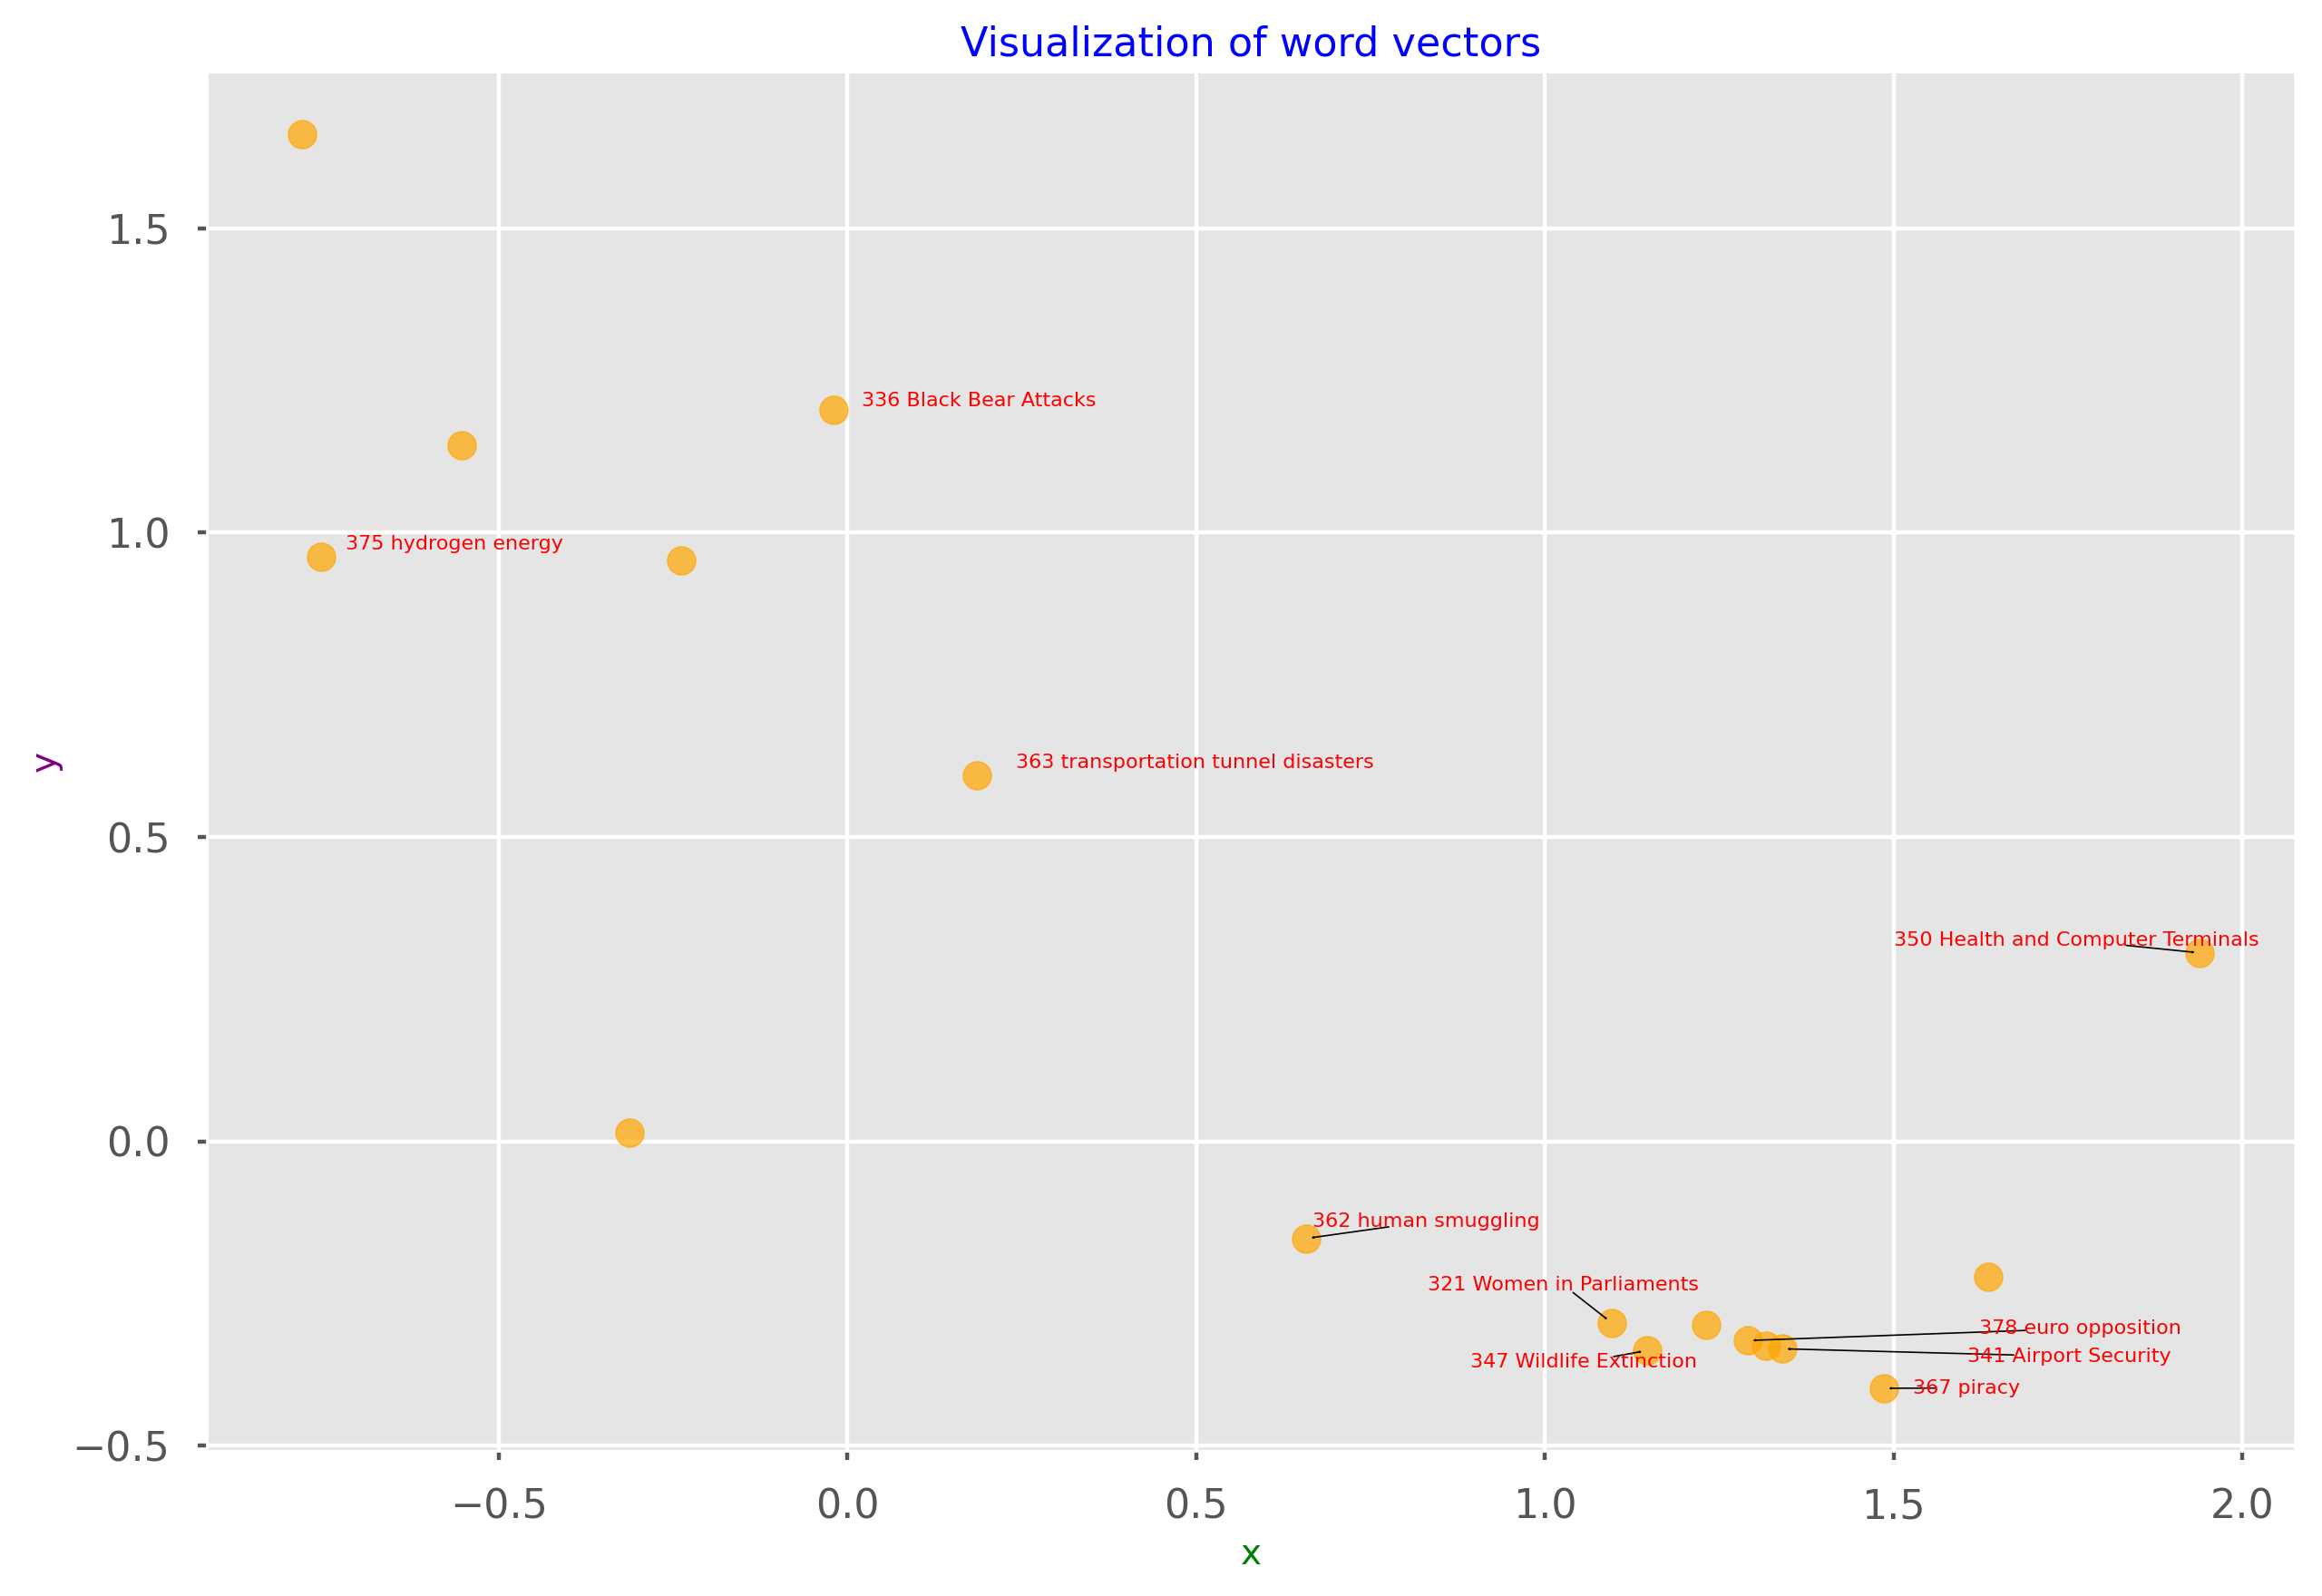

In [36]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from adjustText import adjust_text

path = "/content/drive/MyDrive/Dataset/TREC2018_Queries.txt"
# Load words from file
with open(path, 'r') as file:
    words = [line.strip().split() for line in file]

# Création d'une liste des mots du vocabulaire
vocab_list = list(model.wv.index_to_key)

# Obtention des vecteurs de mots du vocabulaire
X_train = [model.wv.get_vector(word) for word in vocab_list]

# Obtention des vecteurs des mots dans la liste "words"
X = []
for query in words:
    for word in query:
        if word in model.wv:
            X.append(model.wv.get_vector(word))

# Entraînement de l'analyse en composantes principales (PCA) sur les vecteurs du vocabulaire
pca = PCA(n_components=2)
pca.fit(X_train)

# Transformation des vecteurs de "words" avec PCA
result = pca.transform(X)

plt.style.use('ggplot')
plt.title('Visualization of word vectors', fontsize=16, color='blue')
plt.xlabel('x', fontsize=14, color='green')
plt.ylabel('y', fontsize=14, color='purple')
plt.scatter(result[:,0], result[:,1], color='orange', alpha=0.7)

texts = []
for i, word in enumerate(words):
    texts.append(plt.text(result[i,0], result[i,1], ' '.join(word), fontsize=8, color='red'))  # text properties

adjust_text(texts, force_text=(0.55, 0.55), arrowprops=dict(arrowstyle="-|>", color='black', lw=0.6))  # adjust_text properties

plt.tight_layout()
plt.show()


## Query Expantion
<a id='query'></a>


then we worked on expanding a list of preprocessed queries using a pre-trained Word2Vec model. then iterate through each preprocessed query and retrieves similar terms for each word in the query from the Word2Vec model. If a word is present in the model's vocabulary, it retrieves similar words with a similarity score greater than 0.7. These similar terms are then appended to the original query to form an expanded query.


In [29]:
expanded_queries = []
# Parcourir chaque requête prétraitée
for query in preprocessed_queries:
    similar_terms = []

    # Parcourir chaque mot de la requête
    for word in query:
        # Vérifier si le mot est présent dans le vocabulaire du modèle Word2Vec
        if word in model.wv:

            similar_words = model.wv.most_similar(word)

            # Sélectionner les termes similaires pertinents
            for similar_word, similarity in similar_words:
                if similarity > 0.7:
                    similar_terms.append(similar_word)

    # Ajouter les termes similaires à la requête d'origine pour former la requête élargie
    expanded_query = query + similar_terms

    # Ajouter la requête élargie à la liste des requêtes élargies
    expanded_queries.append(expanded_query)

# Afficher les requêtes élargies
for idx, query in enumerate(expanded_queries):
    print(f"Expanded query {idx + 1}: {query}")



Expanded query 1: ['321', 'woman', 'parliament', '291', '353', '336', '288', '229', '211', '521', '274', '226', '294', 'man', 'cabotaj', 'parliamentari', 'bundestag', 'parliamentarian', 'mp', 'knesset', 'posselt', 'verkhovna', 'mpig', 'fidesz', 'majl']
Expanded query 2: ['336', 'black', 'bear', 'attack', '278', '294', '346', '297', '318', '386', '423', '274', '371', '229', 'white', 'terrorist', 'rampag']
Expanded query 3: ['341', 'airport', 'secur', '286', '266', '244', '274', '219', '294', '343', '278', '264', '229', 'lungi', 'bwi', 'flight', 'stanst', 'aiport', 'narita', 'teterboro', 'heathrow', 'tempelhof', 'lga', 'unprofor']
Expanded query 4: ['347', 'wildlif', 'extinct', '351', '540', '338', '372', '341', '785', 'telecki', 'izembek', 'habitat', 'conservationist', 'biwer', 'malilangw', 'migratori', 'fisheri', 'overhunt', 'triassic', 'dinosaur', 'speci', 'megafaun', 'ichthyosaur', 'dreadnoughtu', 'speciat', 'interbreed', 'interbr']
Expanded query 5: ['350', 'health', 'comput', 'term

This processes a list of expanded queries, removing any numbers from each word in the expanded query. The modified expanded queries, without numbers, are stored in a new list called `expanded_queries_1`. The original queries and the modified expanded queries are then printed for comparison. Additionally, the modified expanded queries are saved to a file for further analysis or use.





In [30]:
# List to store the new expanded queries
expanded_queries_1= []

# Loop through each expanded query
for expanded_query in expanded_queries:
    # Remove numbers from each word in the expanded query
    expanded_query_1 = [word for word in expanded_query if not word.isdigit()]
    # Add the modified expanded query to the list
    expanded_queries_1.append(expanded_query_1)

# Print the original queries
print("Original Queries:")
for idx, query in enumerate(preprocessed_queries):
    print(f"Original Query {idx + 1}: {query}")

# Print the expanded queries
print("\nExpanded Queries :")
for idx, query in enumerate(expanded_queries_1):
    print(f"Expanded Query {idx + 1}: {query}")

# Save the expanded queries to a file
output_file_without_numbers = '/content/drive/MyDrive/Dataset/expanded_queries_.txt'
with open(output_file_without_numbers, 'w') as file:
    file.write("Original Queries:\n")
    for idx, query in enumerate(preprocessed_queries):
        file.write(f"Original Query {idx + 1}: {query}\n")

    file.write("\nExpanded Queries \n")
    for idx, query in enumerate(expanded_queries_1):
        file.write(f"Expanded Query {idx + 1}: {query}\n")

print("Queries have been saved to:", output_file_without_numbers)


Original Queries:
Original Query 1: ['321', 'woman', 'parliament']
Original Query 2: ['336', 'black', 'bear', 'attack']
Original Query 3: ['341', 'airport', 'secur']
Original Query 4: ['347', 'wildlif', 'extinct']
Original Query 5: ['350', 'health', 'comput', 'termin']
Original Query 6: ['362', 'human', 'smuggl']
Original Query 7: ['363', 'transport', 'tunnel', 'disast']
Original Query 8: ['367', 'piraci']
Original Query 9: ['375', 'hydrogen', 'energi']
Original Query 10: ['378', 'euro', 'opposit']

Expanded Queries :
Expanded Query 1: ['woman', 'parliament', 'man', 'cabotaj', 'parliamentari', 'bundestag', 'parliamentarian', 'mp', 'knesset', 'posselt', 'verkhovna', 'mpig', 'fidesz', 'majl']
Expanded Query 2: ['black', 'bear', 'attack', 'white', 'terrorist', 'rampag']
Expanded Query 3: ['airport', 'secur', 'lungi', 'bwi', 'flight', 'stanst', 'aiport', 'narita', 'teterboro', 'heathrow', 'tempelhof', 'lga', 'unprofor']
Expanded Query 4: ['wildlif', 'extinct', 'telecki', 'izembek', 'habita

## Conclusion
<a id='conclusion'></a>



In conclusion, we have worked on the implementation of query expansion techniques using natural language processing (NLP) and Word2Vec word embeddings. By preprocessing a queries, training a Word2Vec model, and expanding queries based on semantic similarity, the notebook aimed to enhance the relevance of search results. Through various sections covering data preprocessing, model training, and query expansion. Such techniques contribute to more effective search engine performance, ultimately enhancing user experience and satisfaction.